# Load and check data

In [1]:
import pandas as pd

%cd "D:\Dropbox\Python Projects\Python cluster analysis"

dat = pd.read_csv('CC_GENERAL.csv')

dat.head()

D:\Dropbox\Python Projects\Python cluster analysis


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
# Print column names

{print(cols) for cols in dat}

CUST_ID
BALANCE
BALANCE_FREQUENCY
PURCHASES
ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES
CASH_ADVANCE
PURCHASES_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY
PURCHASES_INSTALLMENTS_FREQUENCY
CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX
PURCHASES_TRX
CREDIT_LIMIT
PAYMENTS
MINIMUM_PAYMENTS
PRC_FULL_PAYMENT
TENURE


{None}

In [3]:
# Alternate means to print column names as a list

dat.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [4]:
# Row and column count

shape_count = dat.shape

print("Data shape:", shape_count)

print("")

nrow = len(dat.index)
ncol = len(dat.columns)

print("Number of rows:   ", nrow)
print("Number of columns:", ncol)

Data shape: (8950, 18)

Number of rows:    8950
Number of columns: 18


In [5]:
# Count missing values in each column

total_nan_bycolumn = dat.isna().sum()

total_nan_bycolumn

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# Total NA values -- use two sum() functions

total_nan = dat.isna().sum().sum()

print("Total missing values:", total_nan)

Total missing values: 314


In [7]:
# Alternate total NA values -- use sum() on column count - equivalent of sum().sum()

total_nan2 = total_nan_bycolumn.sum()

print("Total missing values:", total_nan2)

Total missing values: 314


In [8]:
# Remove missing values
# 'axis = 0' indicates rows will be dropped, 'axis = 1' indicates 

dat = dat.dropna()

nrow = len(dat.index)
ncol = len(dat.columns)

print("Number of rows:   ", nrow)
print("Number of columns:", ncol)

Number of rows:    8636
Number of columns: 18


Text(0.5, 1.0, 'Data range')

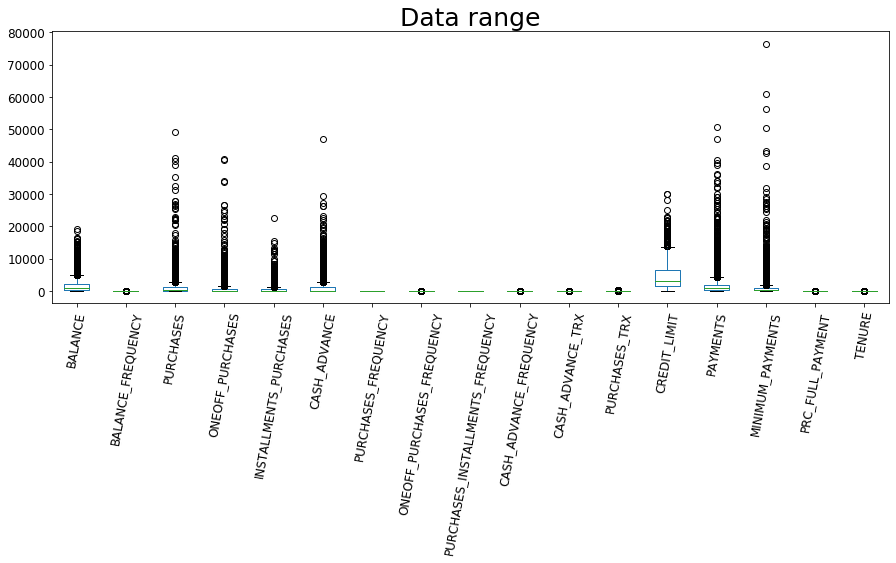

In [9]:
# Create boxplot of data

import matplotlib.pyplot as plt

plt.figure(figsize = (15,5))    # figsize must come before the plot
dat.boxplot(grid = False, rot = 80, fontsize = 12)
plt.title("Data range", fontsize = 25)


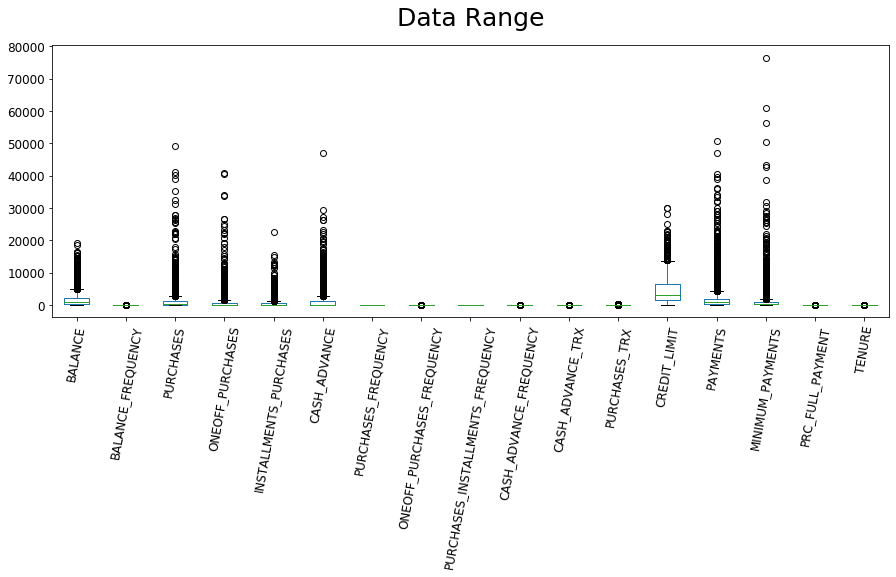

In [10]:
# User defined function to create boxplot

def my_boxplot(DAT, TITLE):
    import matplotlib.pyplot as plt
    plt.figure(figsize = (15,5))    # figsize must come before the plot
    DAT.boxplot(grid = False, rot = 80, fontsize = 12)
    plt.title(TITLE, fontsize = 25, pad = 20) # 'pad' increases distance between title and plot
    
my_boxplot(dat, "Data Range")    

In [11]:
# Remove 'TENURE' and 'CUST_ID' from data for clustering

dat = dat.drop(['CUST_ID', 'TENURE'], axis = 1)

nrow = len(dat.index)
ncol = len(dat.columns)

print("Number of rows:   ", nrow)
print("Number of columns:", ncol)

print("")

for col in dat.columns:
    print(col)

Number of rows:    8636
Number of columns: 16

BALANCE
BALANCE_FREQUENCY
PURCHASES
ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES
CASH_ADVANCE
PURCHASES_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY
PURCHASES_INSTALLMENTS_FREQUENCY
CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX
PURCHASES_TRX
CREDIT_LIMIT
PAYMENTS
MINIMUM_PAYMENTS
PRC_FULL_PAYMENT


# Hierarchical cluster analysis

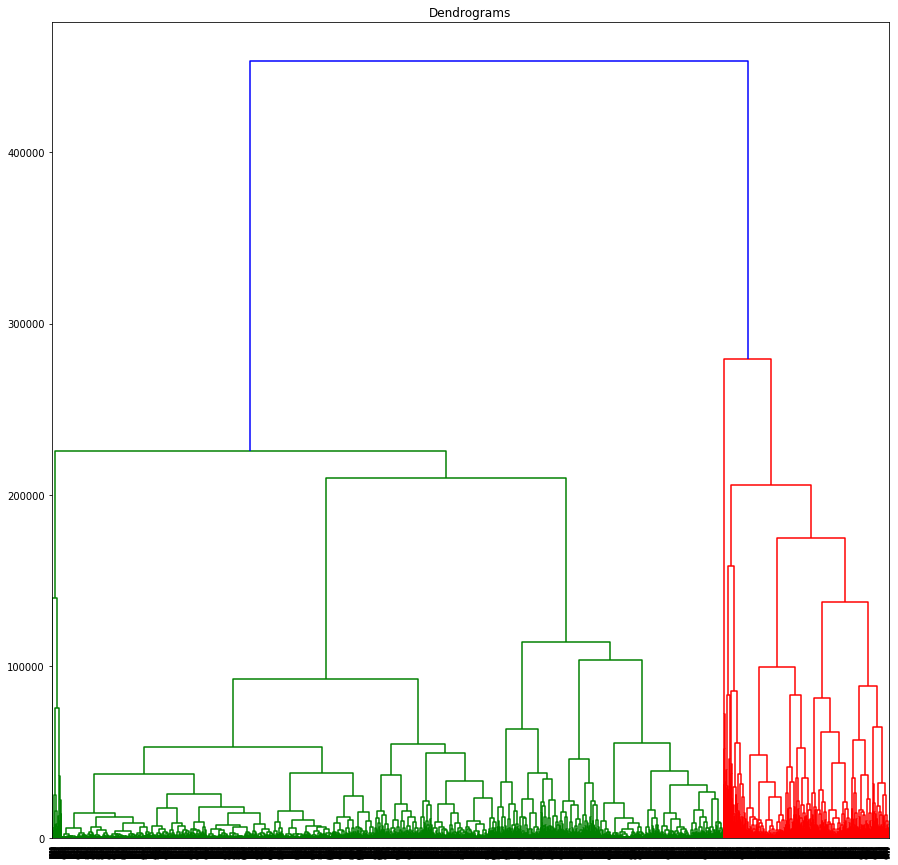

In [12]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dat, method='ward'))

In [25]:
cluster_number = 10

In [26]:
# Predict the clusters that each observation belongs to

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=cluster_number, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(dat)

# Add cluster labels to dataframe

dat['CLUSTER_LABELS'] = cluster_labels

# Calculate size of clusters

clusters = {}

for cl in range(cluster_number):
    clusters["Cluster_" + str(cl)] = dat[dat['CLUSTER_LABELS'] == cl]
    print("Cluster", cl, "size: ", len(clusters["Cluster_" + str(cl)]))

Cluster 0 size:  2336
Cluster 1 size:  4504
Cluster 2 size:  673
Cluster 3 size:  165
Cluster 4 size:  392
Cluster 5 size:  23
Cluster 6 size:  86
Cluster 7 size:  47
Cluster 8 size:  7
Cluster 9 size:  403


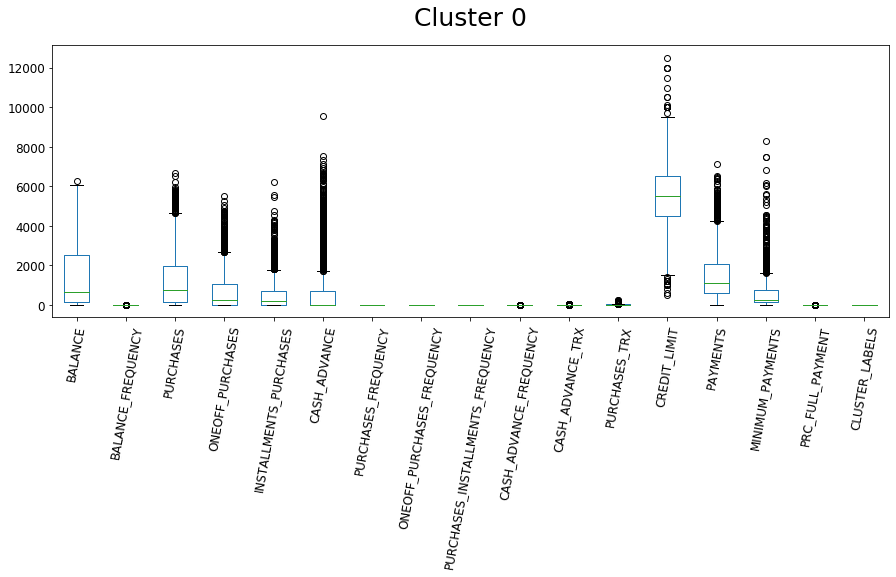

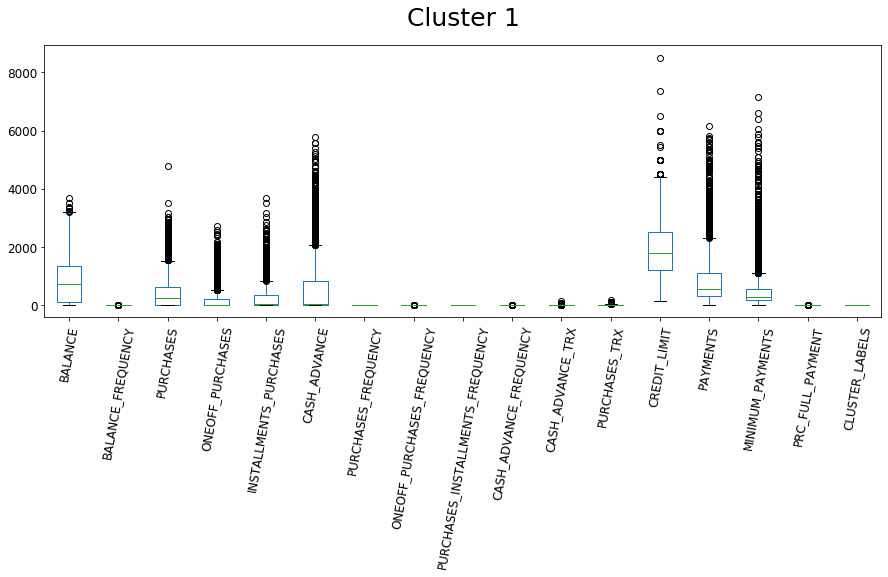

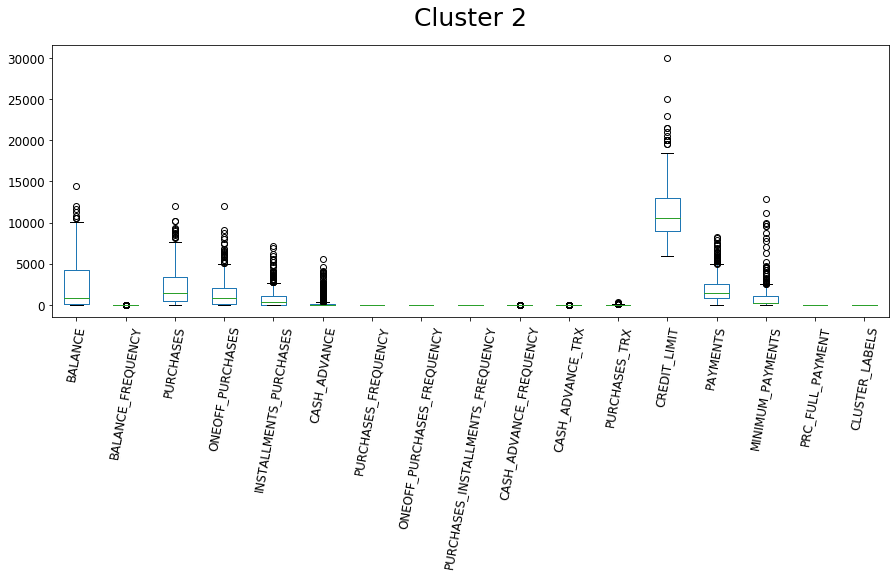

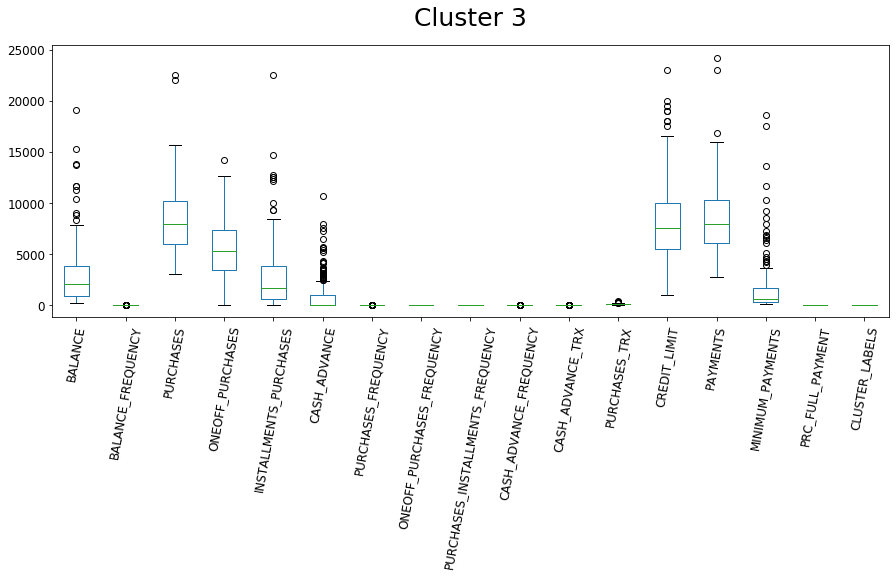

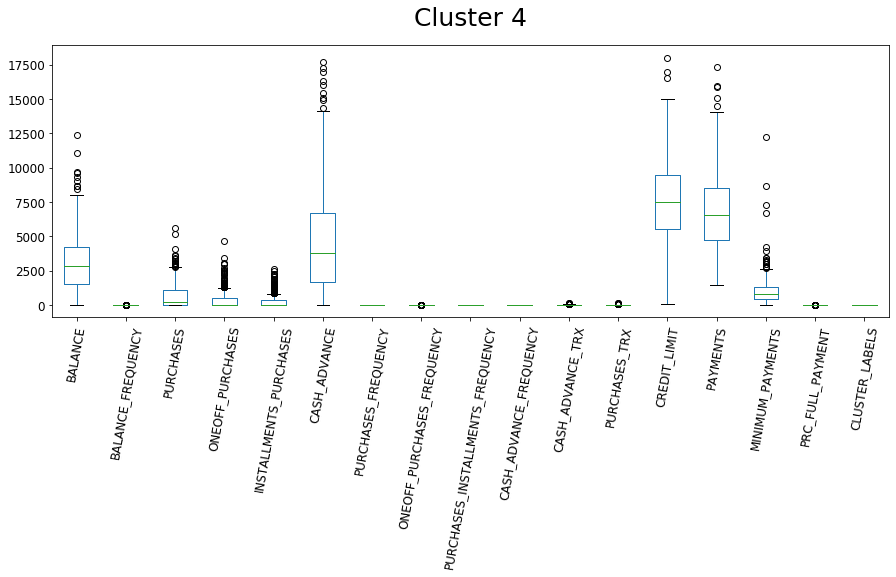

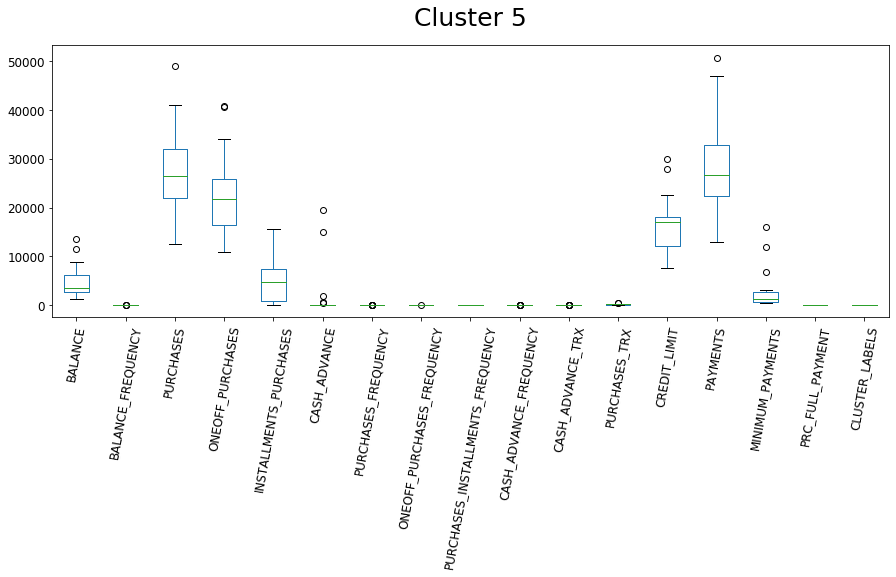

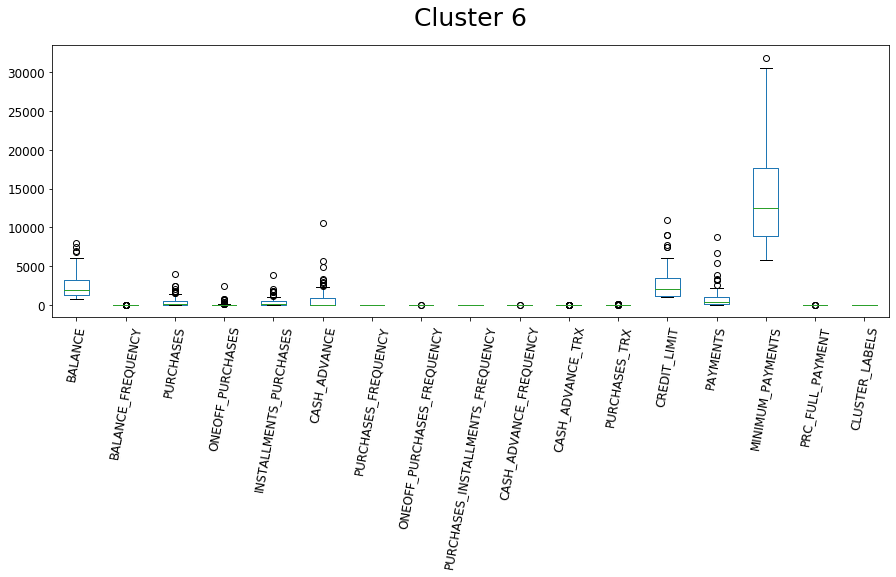

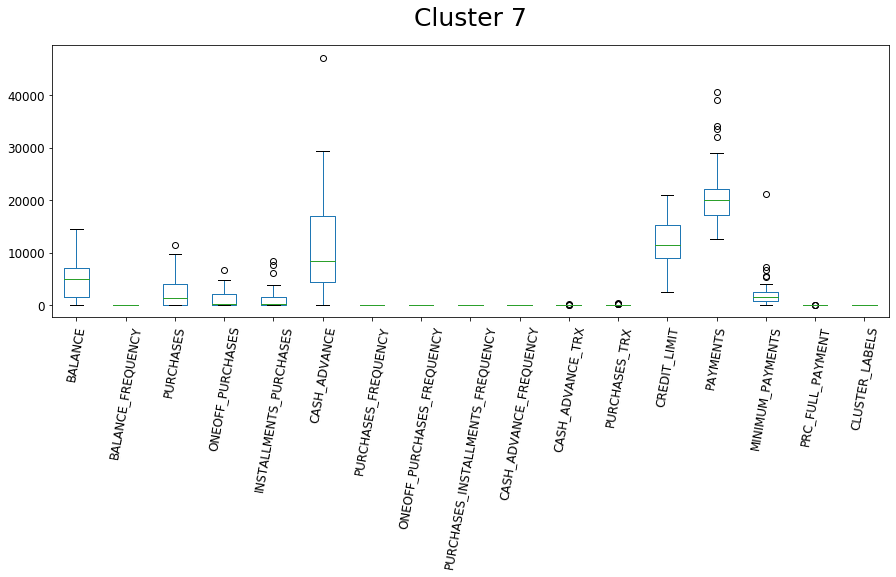

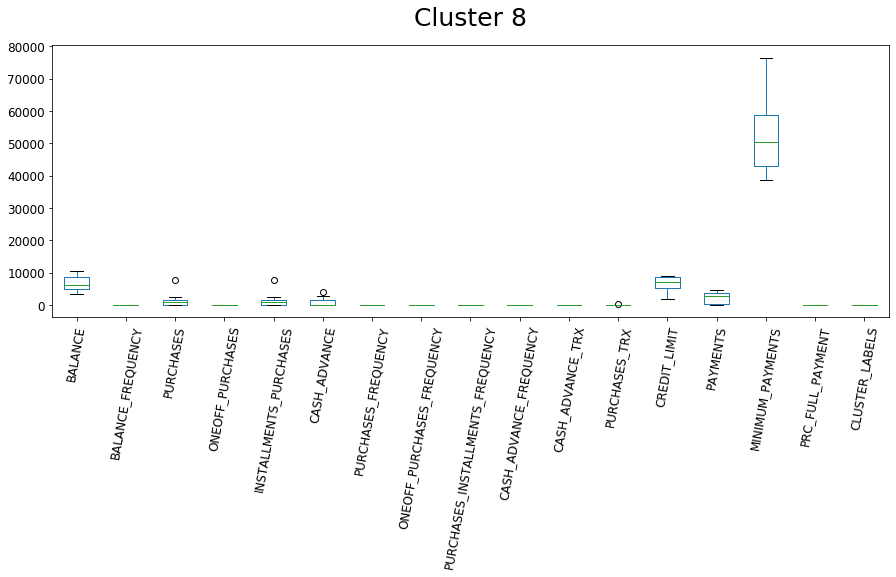

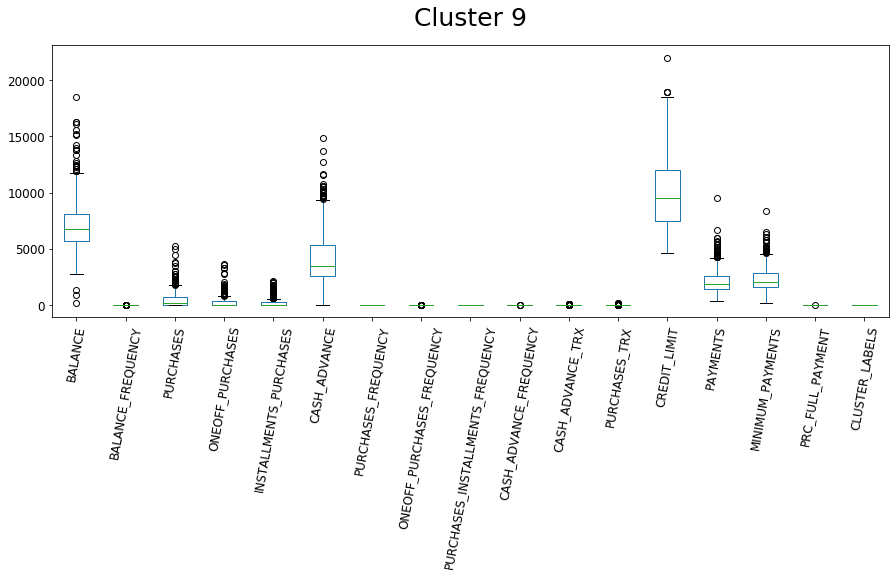

In [27]:
# Create loop to create boxplots

for cl_num in range(cluster_number):
    cluster_subset = dat[dat.CLUSTER_LABELS == cl_num]
    plt.figure(figsize = (15,5))    # figsize must come before the plot
    cluster_subset.boxplot(grid = False, rot = 80, fontsize = 12)
    plt.title('Cluster %d' %cl_num, fontsize = 25, pad = 20) # 'pad' increases distance between title and plot